__Import Packages__

In [1]:
#pip install wordcloud

In [2]:
import requests
import nltk
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel

__Get text data from blogpost__

In [3]:
url = "https://talesoftravels2405.wordpress.com/2018/04/08/hampi-the-forgotten-kingdom/"

In [4]:
response = requests.get(url)

In [5]:
if response.status_code == 200:
    content = response.text
else:
    print("Error:", response.status_code)

__Remove HTML tags from the text__

In [6]:
parsed_text = BeautifulSoup(content, "html.parser").get_text()
#parsed_text

__PREPROCESSING__

__1. Tokenize__

In [7]:
text_token = wt(parsed_text)
len(text_token)

1280

__2. Lower Casing__

In [8]:
lowercase_text = [token.lower() for token in text_token]
len(lowercase_text)

1280

__3. Stopword Removal__

In [9]:
stopWords = set(sw.words('english'))
filtered_text = [token for token in lowercase_text if token not in stopWords]
len(filtered_text)

779

__4. Cleaning and Normalization__

__a. Remove punctuation__

In [10]:
nopunct_text = [re.sub(r'[^\w\s]', ' ', token) for token in filtered_text]
len(nopunct_text)

779

__b. Remove Spaces__

In [11]:
nospace_text = [token for token in nopunct_text if token.strip() != '']
len(nospace_text)

623

__c. Remove Numbers__

In [12]:
nonum_text = [token for token in nospace_text if not re.match(r'^\d+$', token)]
len(nonum_text)

602

__d. Lemmatization__

In [13]:
lemm = WordNetLemmatizer()
lemmd_text = [lemm.lemmatize(token) for token in nonum_text]
len(lemmd_text)

602

__WORD CLOUD__

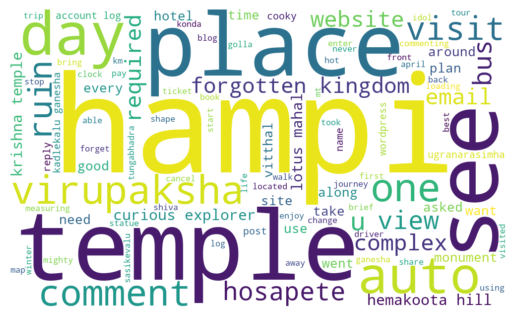

In [14]:
text = ' '.join(lemmd_text)
wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words=100).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

__TOPIC MODELING__

In [15]:
# Create sentence tokens
sent_token = nltk.sent_tokenize(parsed_text)

token_list = []

# Create list of lists
for s in sent_token:
    
    # Tokenize and lower case each sentence
    s_token = wt(s.lower())
    
    # Remove punctuation
    s_token_1 = [re.sub(r'[^\w\s]', ' ', token) for token in s_token]
    
    # Remove Spaces
    s_token_2 = [token for token in s_token_1 if token.strip() != '']
    
    # Remove Numbers
    s_token_3 = [token for token in s_token_2 if not re.match(r'^\d+$', token)]
    
    # Stopword Removal
    s_token_4 = [token for token in s_token_3 if token not in stopWords]
    
    token_list.append(s_token_4)

Topic 0: ['one', 'also', 'good', 'mts', 'tickets', 'temple', 'measuring', 'monuments', 'rs', 'ganeshas', '4 5', 'respectively', 'monolithic', '2 4', 'statues']


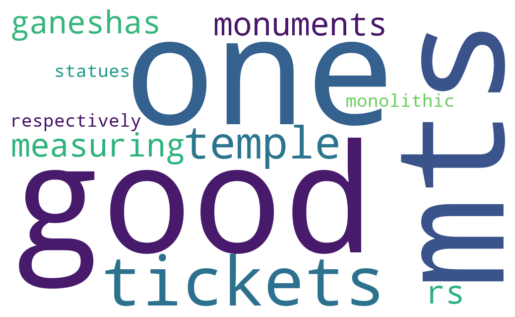

Topic 1: ['temple', 'krishna', 'lotus', 'mahal', 'complex', 'vitthal', 'hampi', 'ganesha', 'also', 'went', 'virupaksha', 'hemakoota', 'hill', 'kadlekalu', 'along']


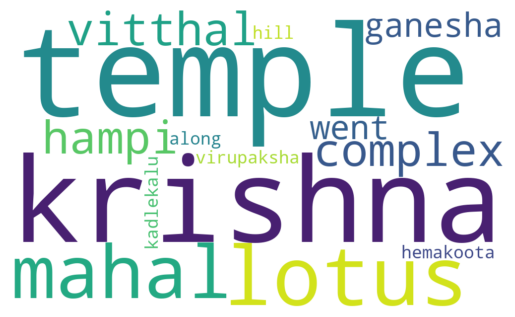

Topic 2: ['temple', 'day', 'hampi', 'buses', 'hosapete', 'pillars', 'difficult', 'musical', 'inside', 'hyderabad', 'belgaum', 'trains', 'cubicle', 'chariot', 'bangalore']


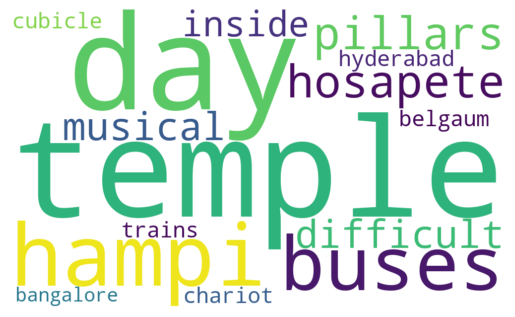

Topic 3: ['hampi', 'every', 'explorer', 'curious', 'idol', 'first', 'mahal', 'forget', 'never', 'ruins', 'life', 'mind', 'traveler', 'heart', 'trapped']


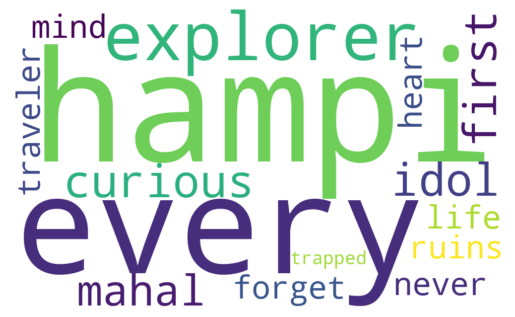

Topic 4: ['reply', 'hampi', 'comment', 'required', 'like', 'time', 'done', 'artists', 'monument', 'precision', 'sculpting', 'visit', 'ruins', 'unesco', 'world']


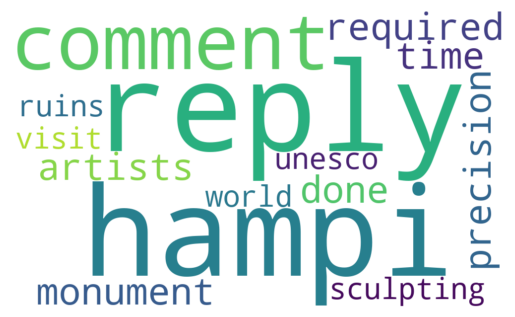

Topic 5: ['hampi', 'hotel', 'see', 'trip', 'required', 'day', 'temple', 'follow', 'curious', 'sign', 'explorer', 'following', 'view', 'like', 'walk']


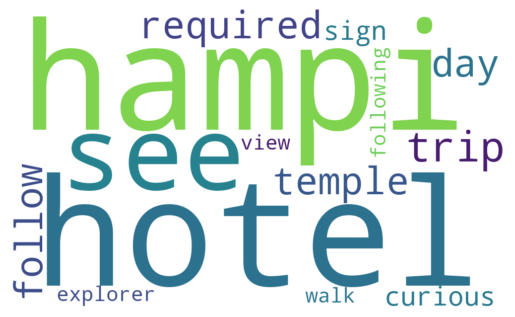

Topic 6: ['hampi', 'use', 'shape', 'commenting', 'account', 'website', 'log', 'using', 'enjoy', 'need', 'see', 'would', 'asked', 'us', 'show']


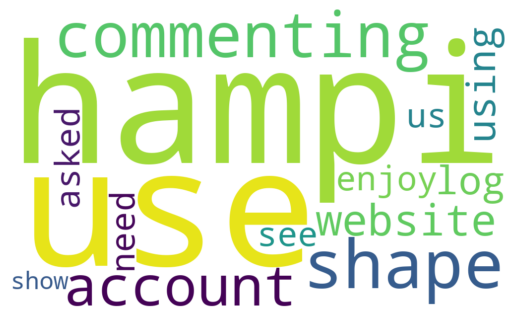

Topic 7: ['email', 'notify', 'new', 'via', 'hill', 'hemakoota', 'ganesha', 'log', 'tour', 'change', 'connecting', 'comments', 'start', 'cancel', 'posts']


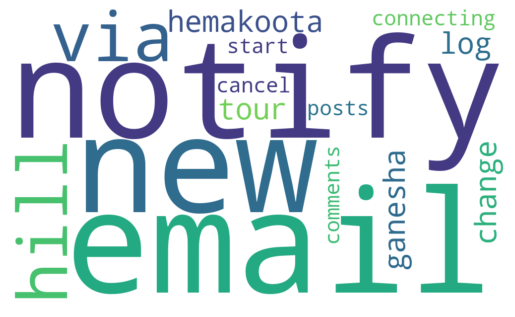

Topic 8: ['take', 'places', 'day', 'back', 'able', 'want', 'see', 'rs', 'map', 'get', 'asked', 'would', 'bring', 'us', 'auto']


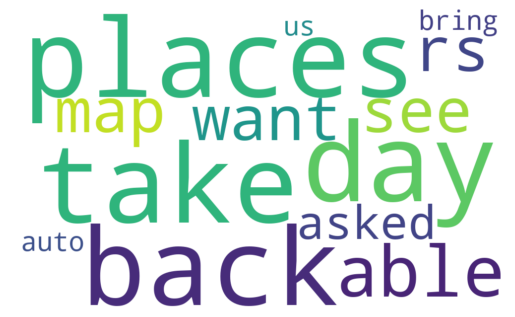

Topic 9: ['hampi', 'forgotten', 'cookies', 'kingdom', 'around', 'also', 'places', 'visit', 'clock', 'hot', 'beginsfacebookinstagramlinkedinyoutube', 'kingdom the', 'travel', 'much', 'march']


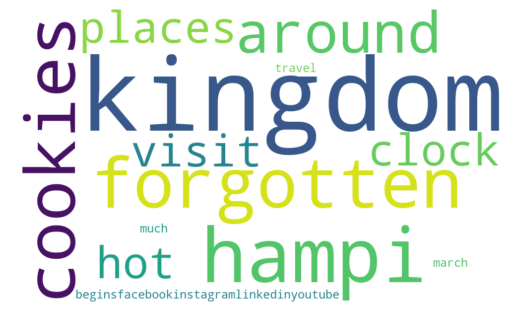

In [19]:
# Create disctionary from token list
dictionary = corpora.Dictionary(token_list)

# Create a document term matrix
corpus = [dictionary.doc2bow(list(tokens)) for tokens in token_list]

# Train LDA model
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and associated keywords
for topic_id in range(num_topics):
    topic_words = lda_model.get_topic_terms(topic_id, topn=15)
    topic_keywords = [dictionary[word_id] for word_id, _ in topic_words]
    print(f"Topic {topic_id}: {topic_keywords}")
    
    # Create word cloud for each topic
    
    text = ' '.join(topic_keywords)
    wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words=15).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()